In [27]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import plotly.graph_objects as go
import math
import scipy.misc as smp

In [2]:
def DichotomyRootFinder(f, a, b, eps=10e-4):
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    m = (a + b)/2
    if np.abs(f(m)) < eps:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return DichotomyRootFinder(f, m, b, eps)
    elif np.sign(f(b)) == np.sign(f(m)):
        return DichotomyRootFinder(f, a, m, eps)

In [3]:
DichotomyRootFinder(lambda x: x**2 - 2, -5, 0) - (-math.sqrt(2))

2.8992060595145475e-05

In [4]:
def NumericalIntegration(f, a, b, h = 0.001):
    integral = 0
    x = a
    while x < b:
        integral += h * f(x)
        x += h
    return integral

In [5]:
def ComplexNumericalDifferentiation(function, z0, order = 1, h = 0.01, r = 1, integrator=NumericalIntegration):

    i = complex(0, 1)
    f = lambda _phi: function(z0 + r * np.exp(i * _phi)) * np.exp(-i * order * _phi) / np.power(r, order)
    integral = integrator(f, 0, 2 * np.pi, h)
    integral /= (2 * np.pi)
    integral *= np.math.factorial(order)
    return integral

In [6]:
def RealNumericalDifferentiation(function, x0, order = 1, h = 0.01, integrator=NumericalIntegration):
    return ComplexNumericalDifferentiation(function, x0, order = 1, h = 0.01, integrator=integrator).real

In [7]:
def NewtonRootFinder(f, x0, Df = None, eps=10e-4, maxIterations=1000):
    #if Df is None: Df = lambda x: RealNumericalDifferentiation(function=f, x0=x)
    if Df is None: Df = lambda x: ComplexNumericalDifferentiation(function=f, z0=x, r=eps).real
    x = x0
    for n in range(0, maxIterations):
        fx = f(x)
        if abs(fx) < eps:
            return x
        Dfx = Df(x)
        if Dfx == 0:
            return None
        x = x - fx/Dfx
    return None

In [8]:
def SecantRootFinder(f, x0, eps=10e-4, maxIterations=1000):
    x = x0
    x_prev = x0 + 2 * eps
    for n in range(0, maxIterations):
        fx = f(x)
        if abs(fx) < eps:
            return x
        x, x_prev = x - fx / (fx - f(x_prev)) * (x - x_prev), x
    return None

In [9]:
def ComplexSecantRootFinder(f, z0 : complex, eps=10e-4, maxIterations=1000):
    z = z0
    z_prev = z0 + 2 * eps
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(fz) < eps:
            return z
        z, z_prev = z - fz / (fz - f(z_prev)) * (z - z_prev), z
    return None

In [10]:
print(NewtonRootFinder(lambda x: x**2 - 2, -2, lambda x: 2*x) - (-math.sqrt(2)))
print(NewtonRootFinder(lambda x: x**2 - 2, -2) - (-math.sqrt(2)))
print(SecantRootFinder(lambda x: x**2 - 2, -2) - (-math.sqrt(2)))

-2.1239014147411694e-06
8.939052606748987e-05
-2.1059199222239755e-06


In [3]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4, maxIterations=1000):
    if Df is None: Df = lambda z: ComplexNumericalDifferentiation(function=f, z0=z, r=eps)
    z = z0
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(fz) < eps:
            return z
        Dfz = Df(z)
        if Dfz == 0:
            return ComplexNewtonRootFinder(f, z0 + eps, Df, eps, maxIterations)
            #return None
        z = z - fz/Dfz
    return None

In [4]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4):
    if Df is None: Df = lambda z: (f(z+eps) - f(z-eps)) / (2 * eps)
    z = z0
    z_prev = z0 - 2 * eps
    while np.abs(z - z_prev) > eps:
        z_prev = z
        z = z - f(z)/Df(z)
    return z

In [2]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4):
    if Df is None: Df = lambda z: (f(z+eps) - f(z-eps)) / (2 * eps)
    z = z0
    while np.abs(f(z)) > eps:
        z = z - f(z)/Df(z)
    return z

In [ ]:
print(NewtonRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5))
print(SecantRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5))
print(ComplexNewtonRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5).real)
print(ComplexSecantRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5).real)

In [ ]:
X = np.linspace(-1, 1, 10)
F = 4*np.log(2-np.exp(-X))-X+5
dF = ComplexNumericalDifferentiation(lambda X: 4*np.log(2-np.exp(-X))-X+5, X, r=0.001).real
plt.plot(X, F, 'ro')
plt.plot(X, dF, 'bo')
#plt.legend()
plt.grid()
plt.figure(figsize=(500, 500))
plt.show()

In [3]:
def ComplexModulus(z):
    return math.sqrt((z.real)**2+(z.imag)**2)

In [21]:
n = 1000
D = 10
R = np.linspace(-D, D, n)
I = np.linspace(-D, D, n)
d = np.zeros((n, n))
for ri, r in np.ndenumerate(R):
    for ii, i in np.ndenumerate(I):
        #d[i][j] = ComplexNumericalDifferentiation(lambda z: z**5 + 1, complex(i, j)).real
        root = ComplexNewtonRootFinder(lambda z: z**5+1, complex(r, i))
        d[ri][ii] = root.real * root.imag
        #d[ri][ii] = ComplexModulus(ComplexNewtonRootFinder(lambda z: z**5+1, complex(r, i)))#.real

In [ ]:
print(ComplexNewtonRootFinder(lambda z: z**5-1, complex(-2.0, -0.26262626262626254)))

In [4]:
fig = go.Figure(data=
    go.Contour(
        x=R,
        y=I,
        z=d,
        line_smoothing=0.85,
        colorscale='rainbow',
        colorbar=dict(
            title='', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')),
        contours=dict(
            coloring ='heatmap',
            showlabels = False, # show labels on contours
            #labelfont = dict( # label font properties
            #    size = 12,
            #    color = 'black',
            #)
        )))

fig.update_layout(
    autosize=False,
    width=600,
    height=600
)

fig.update_xaxes(
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
'''
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
'''

fig.show()


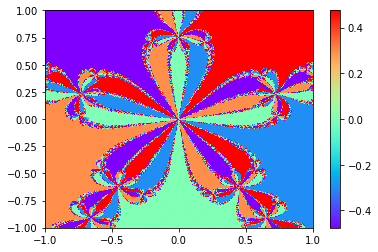

<Figure size 36000x36000 with 0 Axes>

In [20]:
fig, ax = plt.subplots()
c = ax.pcolormesh(R, I, d, cmap='rainbow', shading='auto')
#ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)
plt.figure(figsize=(500, 500))
plt.show()

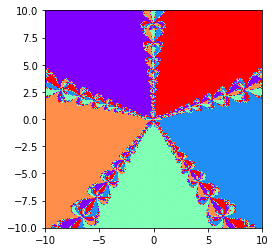

<Figure size 36000x36000 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
c = ax.pcolormesh(R, I, d, cmap='rainbow', shading='auto')
#ax.set_title('pcolormesh')
#fig.colorbar(c, ax=ax)
plt.figure(figsize=(500, 500))
ax.set_aspect('equal', adjustable='box')
plt.show()

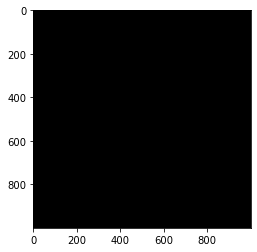

In [29]:
# Create a nxnx3 array of 8 bit unsigned integers
data = np.zeros( (n,n,3), dtype=np.uint8 )

data[512,512] = [254,0,0]       # Makes the middle pixel red
data[512,513] = [0,0,255]       # Makes the next pixel blue

plt.imshow(data, interpolation='nearest')
plt.show()